# 图像色彩空间转换
我们看到的色彩多种多样，在计算机图像早期，影响记载的图像只有黑白两种颜色，后来有了灰度图像，早期的黑白电视就是灰度图像。而通过图像的色彩空间，就过渡到了彩色电视。

不同设备的色彩表现形式不一样，也就产生了不同的色彩空间，其中RGB色彩空间是一种设备无关的色彩空间。通过`imread`读取的图像就是采用RGB色彩空间，这就使得图像在不同设备上的一致。

另外，在linux和android上拍出来的照片采用的是YUV的色彩空间，但是其做了转换，转成了RGB的色彩空间，从而保证了图像拷贝到不同设备后显示的一致性。

既然存在多种色彩空间，那色彩空间之间如何转换，在opencv中提供了`cvtColor`方法来进行色彩空间的转换。

## `cvtColor(src, code[, dst[, dstCn]]) -> dst` 色彩空间转换
将图像从一个色彩空间转另一个色彩空间，需要注意的是如果要从RGB转换成其他色彩空间或者从其他色彩空间转换成RGB，应当显式的指定顺序。
> opencv默认颜色空间通常称为RGB，但其实是BGR

`cvtColor`接收四个参数：
- `src`: 图像数据
- `code`: 图像空间编码
    - COLOR_BGR2GRAY = 6 彩色到灰度
    - COLOR_GRAY2BGR = 8 灰度到彩色
    - COLOR_BGR2HSV = 40 BGR到HSV
    - COLOR_HSV2BGR = 54 HSV到 BGR
- `dst`: 目标图像
- `dstCn`: 目标图像通道数

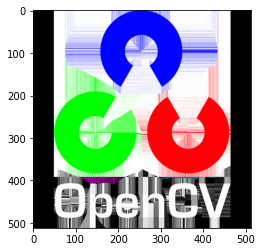

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

src = cv.imread('images/opencv-logo.png')
plt.imshow(src)

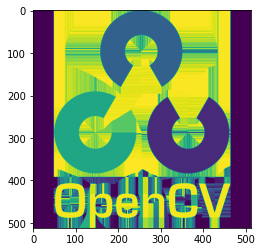

In [3]:
dst_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
plt.imshow(dst_gray)

## `imwrite(filename, img[, params]) -> retval` 写（存）图像
通过`imread`读取到图像的`mat`数据后，对图像进行了一些列的修改（比如色彩空间转换等），将修改后的图像数据保存就需要`imwrite`。图像的格式以后缀名为准。`imwrite`有三个参数：
- `filename`: 保存图像的路径，如果路径错误保存失败，不会有提示
- `img`： 图像数据
- `params`：以键值对编码的特定格式参数

In [7]:
cv.imwrite('images/opencv-logo-dst.jpg', dst_gray)

True

> 一般情况下，只有单通道的8-bit图或3通道（BGR顺序）的24-bit图可以使用该方法保存，除了一下情况：
> - `CV_16U`可以保存成PNG, JPEG 2000, 和TIFF
> - `CV_32F` 可以保存成PFM, TIFF, OpenEXR 和 Radiance HDR
> - 带alpha通道的png也可以使用该方法保存
